In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./cardata.csv')

In [3]:
data

,buying,maint,doors,persons,lug_Boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
#Converting data to integer format
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_Boot'],_ = pd.factorize(data['lug_Boot'])
data['safety'],_ = pd.factorize(data['safety'])
data['class'],class_names = pd.factorize(data['class'])

In [5]:
data

,buying,maint,doors,persons,lug_Boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,3,3,3,2,1,1,3
1724,3,3,3,2,1,2,2
1725,3,3,3,2,2,0,0
1726,3,3,3,2,2,1,3


In [6]:
#Unique data values in the dataset:
for i in data.columns:
    print("Unique Columns: ",data[i].unique()," Number of Columns:  ", data[i].nunique())

Unique Columns:  [0 1 2 3]  Number of Columns:   4
Unique Columns:  [0 1 2 3]  Number of Columns:   4
Unique Columns:  [0 1 2 3]  Number of Columns:   4
Unique Columns:  [0 1 2]  Number of Columns:   3
Unique Columns:  [0 1 2]  Number of Columns:   3
Unique Columns:  [0 1 2]  Number of Columns:   3
Unique Columns:  [0 1 2 3]  Number of Columns:   4


3    432
2    432
1    432
0    432
Name: buying, dtype: int64

3    432
2    432
1    432
0    432
Name: maint, dtype: int64

3    432
2    432
1    432
0    432
Name: doors, dtype: int64

2    576
1    576
0    576
Name: persons, dtype: int64

2    576
1    576
0    576
Name: lug_Boot, dtype: int64

2    576
1    576
0    576
Name: safety, dtype: int64

0    1210
1     384
3      69
2      65
Name: class, dtype: int64



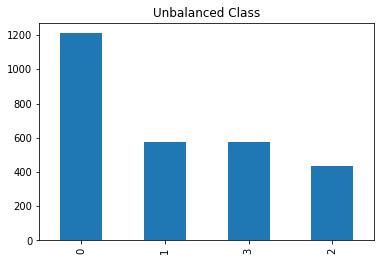

In [7]:
#Data Classification:
for i in data.columns:
    print(data[i].value_counts())
    data[i].value_counts().plot(kind='bar', title='Unbalanced Class');
    print()

      buying  maint  doors  persons  lug_Boot  safety  class
0        0.0    0.0    0.0      0.0       0.0     0.0    NaN
1        0.0    0.0    0.0      0.0       0.0     1.0    NaN
2        0.0    0.0    0.0      0.0       0.0     2.0    NaN
3        0.0    0.0    0.0      0.0       1.0     0.0    NaN
4        0.0    0.0    0.0      0.0       1.0     1.0    NaN
...      ...    ...    ...      ...       ...     ...    ...
4835     NaN    NaN    NaN      NaN       NaN     NaN    3.0
4836     NaN    NaN    NaN      NaN       NaN     NaN    3.0
4837     NaN    NaN    NaN      NaN       NaN     NaN    3.0
4838     NaN    NaN    NaN      NaN       NaN     NaN    3.0
4839     NaN    NaN    NaN      NaN       NaN     NaN    3.0

[9680 rows x 7 columns]


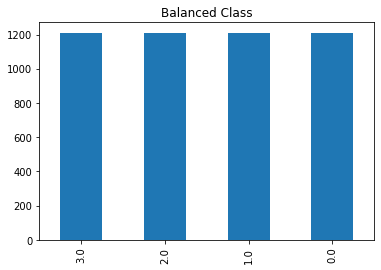

In [16]:
#Sampling(because data is not correctly balanced):
X = data[['buying','maint','doors','persons','lug_Boot','safety']]
Y = data['class']

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, Y_sm = smote.fit_sample(X, Y)
df_smote_over = pd.concat([pd.DataFrame(X_sm), pd.DataFrame(Y_sm, columns=['class'])])
print(df_smote_over)
df_smote_over['class'].value_counts().plot(kind='bar', title='Balanced Class')
plt.show()

In [9]:
# split data randomly into 70% training and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.3)
# print("Number transactions X_train dataset: ", X_train.shape) 
# print("Number transactions y_train dataset: ", Y_train.shape) 
# print("Number transactions X_test dataset: ", X_test.shape) 
# print("Number transactions y_test dataset: ", Y_test.shape) 

In [10]:
# train the decision tree
#print(Y_train.value_counts())
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
Y_pred = dtree.predict(X_test)

In [12]:
count_misclassified = (Y_test != Y_pred).sum()
print("**** Decision Tree ****")
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

**** Decision Tree ****
Misclassified samples: 121
Accuracy: 0.92


In [13]:
feat_names = list(data.columns.values)[:-1]
print(feat_names)

['buying', 'maint', 'doors', 'persons', 'lug_Boot', 'safety']


In [14]:
import numpy as np
feat_importances = dtree.feature_importances_
indices = np.argsort(feat_importances)[::-1]
names = [feat_names[i] for i in indices]
# Display the importances for each feature.
for name, imp in zip(feat_names, feat_importances):
    print("{}: {}".format(name, imp))

buying: 0.21387857274085936
maint: 0.176351827683535
doors: 0.0
persons: 0.12737494905928654
lug_Boot: 0.17474540442875253
safety: 0.3076492460875666


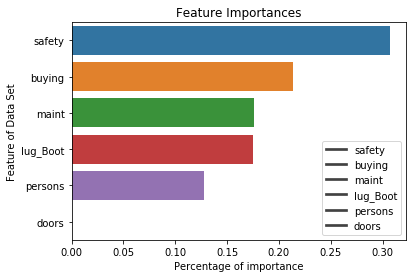

In [15]:
import seaborn as sns
plt.title('Feature Importances')
plt.xlabel('Percentage of importance')
plt.ylabel('Feature of Data Set')
feat_imp_plot = sns.barplot(x=feat_importances[indices], y=names)
feat_imp_plot.legend(names, loc = "best")